In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


facts_table = pd.read_csv('facts_table_with_charge.csv')

facts_table = facts_table[facts_table.time_diff >= 0.25]

facts_table.head()

,device_id,time_diff,battery_diff,rate,charging,number_samples,screen_on_time,screen_off_time,bluetooth_enabled_time,location_enabled_time,power_saver_enabled_time,flashlight_enabled_time,nfc_enabled_time,developer_mode_time,charger
0,1,5.67,-0.65,-0.115,False,58,4.93,0.74,0.0,5.45,0.0,0.0,0.0,0.0,unplugged
1,1,0.98,0.46,0.471,True,47,0.00,0.98,0.0,0.88,0.0,0.0,0.0,0.0,ac
2,1,1.15,-0.10,-0.087,False,11,1.09,0.06,0.0,1.09,0.0,0.0,0.0,0.0,unplugged
3,1,0.84,0.29,0.344,True,30,0.86,-0.02,0.0,0.86,0.0,0.0,0.0,0.0,ac
4,1,0.32,-0.03,-0.095,False,4,0.21,0.11,0.0,0.21,0.0,0.0,0.0,0.0,unplugged


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016180A2B400>,
      dtype=object)

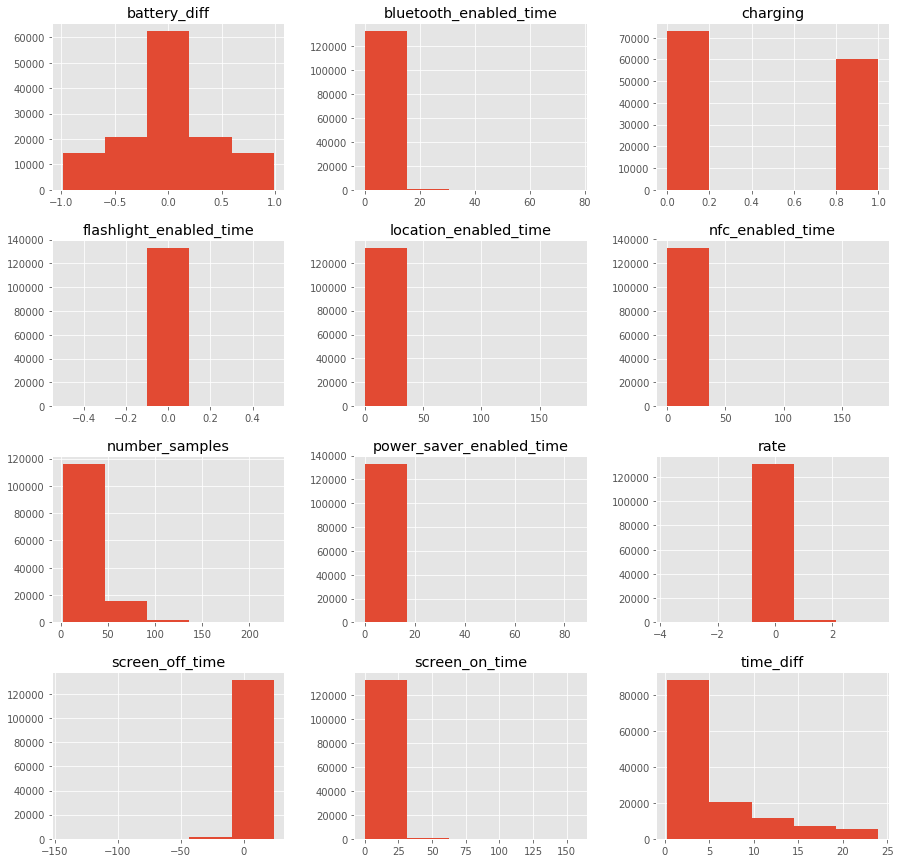

In [2]:
facts_table.drop(['device_id', 'developer_mode_time'], axis=1).hist(figsize=(15,15), bins=5)

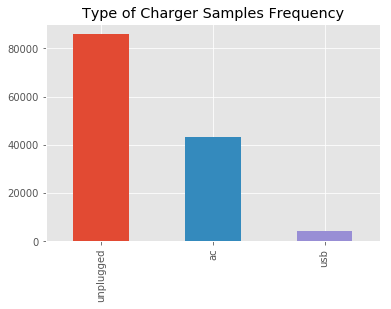

In [3]:
facts_table.charger.value_counts().plot(kind='bar', title='Type of Charger Samples Frequency')

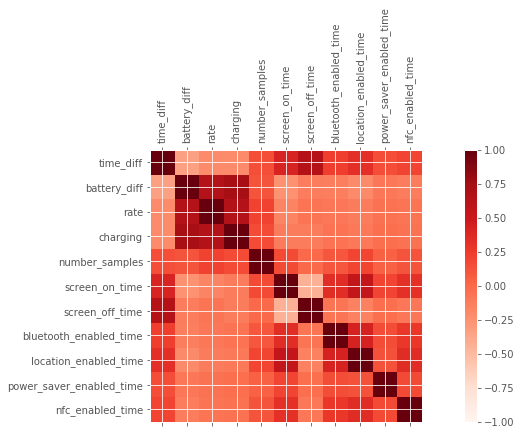

In [4]:
correlations = facts_table.drop(['device_id', 'developer_mode_time', 'flashlight_enabled_time'], axis=1).corr()
# plot correlation matrix
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap='Reds')
fig.colorbar(cax)
ticks = np.arange(0, len(correlations), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(correlations.columns, rotation=90)
ax.set_yticklabels(correlations.columns)

plt.show()

In [5]:
facts_table.drop(['device_id', 'developer_mode_time', 'flashlight_enabled_time'], axis=1).corr().style.background_gradient(cmap='Reds')

,time_diff,battery_diff,rate,charging,number_samples,screen_on_time,screen_off_time,bluetooth_enabled_time,location_enabled_time,power_saver_enabled_time,nfc_enabled_time
time_diff,1,-0.343368,-0.210712,-0.208702,0.14419,0.413622,0.63407,0.228027,0.329333,0.141641,0.197329
battery_diff,-0.343368,1,0.650936,0.732871,0.110071,-0.252329,-0.124035,-0.140391,-0.200938,-0.0800216,-0.12306
rate,-0.210712,0.650936,1,0.65463,0.208017,-0.164369,-0.0680263,-0.0832469,-0.115154,-0.051189,-0.0732095
charging,-0.208702,0.732871,0.65463,1,0.161313,-0.113231,-0.109479,-0.0623883,-0.0887224,-0.0296579,-0.0477209
number_samples,0.14419,0.110071,0.208017,0.161313,1,0.166771,0.000435422,0.107929,0.193221,0.0454178,0.113231
screen_on_time,0.413622,-0.252329,-0.164369,-0.113231,0.166771,1,-0.441761,0.344217,0.549969,0.196019,0.324657
screen_off_time,0.63407,-0.124035,-0.0680263,-0.109479,0.000435422,-0.441761,1,-0.0676627,-0.142592,-0.0269153,-0.0812991
bluetooth_enabled_time,0.228027,-0.140391,-0.0832469,-0.0623883,0.107929,0.344217,-0.0676627,1,0.42837,0.152365,0.274669
location_enabled_time,0.329333,-0.200938,-0.115154,-0.0887224,0.193221,0.549969,-0.142592,0.42837,1,0.130832,0.353737
power_saver_enabled_time,0.141641,-0.0800216,-0.051189,-0.0296579,0.0454178,0.196019,-0.0269153,0.152365,0.130832,1,0.166109


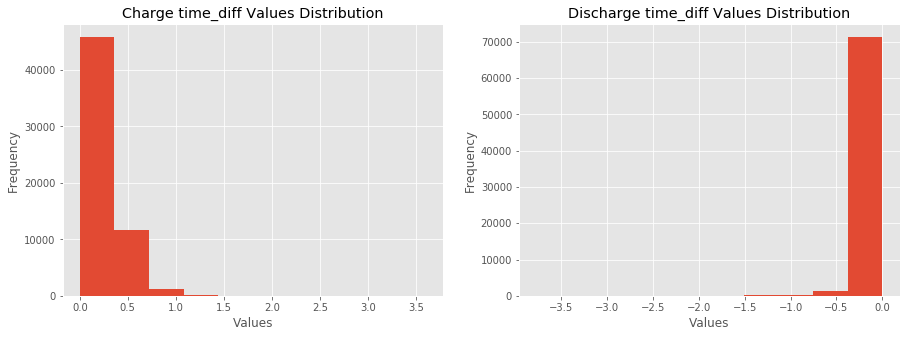

In [6]:
charge_rate_values = facts_table[facts_table.rate > 0].rate
discharge_rate_values = facts_table[facts_table.rate < 0].rate

plt.subplots(1,2,figsize=(15, 5))

plt.subplot(1, 2, 1)
# plot1 = charge_rate_values.hist(title='Services Number of Samples')
# plot1.title('Charge time_diff values distribution')

plot1 = charge_rate_values.plot(kind='hist', title='Charge time_diff Values Distribution')
plot1.set(xlabel='Values', ylabel='Frequency')

plt.subplot(1, 2, 2)
plot2 = discharge_rate_values.plot(kind='hist', title='Discharge time_diff Values Distribution')
plot2.set(xlabel='Values', ylabel='Frequency')

plt.show()

In [7]:
facts_table.head()

,device_id,time_diff,battery_diff,rate,charging,number_samples,screen_on_time,screen_off_time,bluetooth_enabled_time,location_enabled_time,power_saver_enabled_time,flashlight_enabled_time,nfc_enabled_time,developer_mode_time,charger
0,1,5.67,-0.65,-0.115,False,58,4.93,0.74,0.0,5.45,0.0,0.0,0.0,0.0,unplugged
1,1,0.98,0.46,0.471,True,47,0.00,0.98,0.0,0.88,0.0,0.0,0.0,0.0,ac
2,1,1.15,-0.10,-0.087,False,11,1.09,0.06,0.0,1.09,0.0,0.0,0.0,0.0,unplugged
3,1,0.84,0.29,0.344,True,30,0.86,-0.02,0.0,0.86,0.0,0.0,0.0,0.0,ac
4,1,0.32,-0.03,-0.095,False,4,0.21,0.11,0.0,0.21,0.0,0.0,0.0,0.0,unplugged


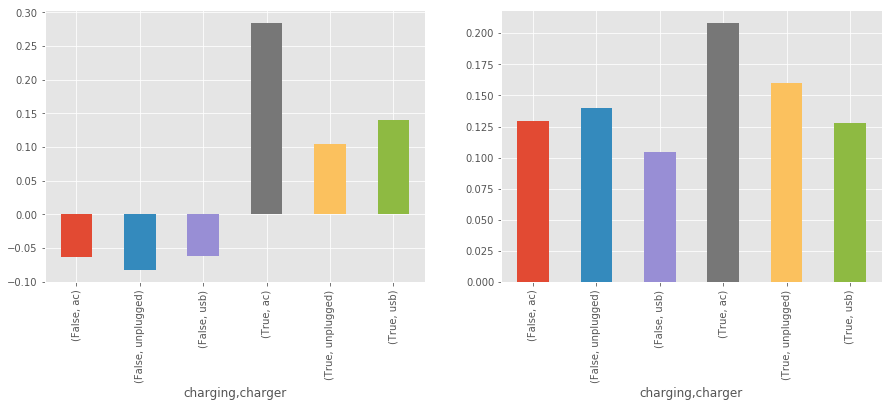

In [8]:
plt.subplots(1,2,figsize=(15, 5))

plt.subplot(1, 2, 1)
facts_table.groupby(['charging', 'charger']).rate.mean().plot(kind='bar')

plt.subplot(1, 2, 2)
facts_table.groupby(['charging', 'charger']).rate.std().plot(kind='bar')